## confidence intervals 

In [50]:
import pandas as pd
import numpy as np
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

coffee=pd.read_csv('/Users/balance/Desktop/udacity-review/A-B Test/Practical_Statistics/data/coffee_dataset.csv')

In [4]:
coffee.shape

(2974, 4)

In [5]:
coffee_red=coffee.sample(200)

In [6]:
coffee_red

,user_id,age,drinks_coffee,height
2402,2874,<21,True,64.357154
2864,3670,>=21,True,66.859636
2167,7441,<21,False,66.659561
507,2781,>=21,True,70.166241
1817,2875,>=21,True,71.369120
...,...,...,...,...
1187,6237,<21,False,62.493744
463,1857,<21,False,66.476106
1195,6397,<21,False,64.555794
1080,4065,<21,False,66.842149


1. What is the proportion of coffee drinkers in the sample? What is the proportion of individuals that don't drink coffee?

In [10]:
(coffee_red.query('drinks_coffee==True')).shape[0]/coffee_red.shape[0]

0.595

In [48]:
(coffee_red.query('drinks_coffee==False')).shape[0]/coffee_red.shape[0]

0.405

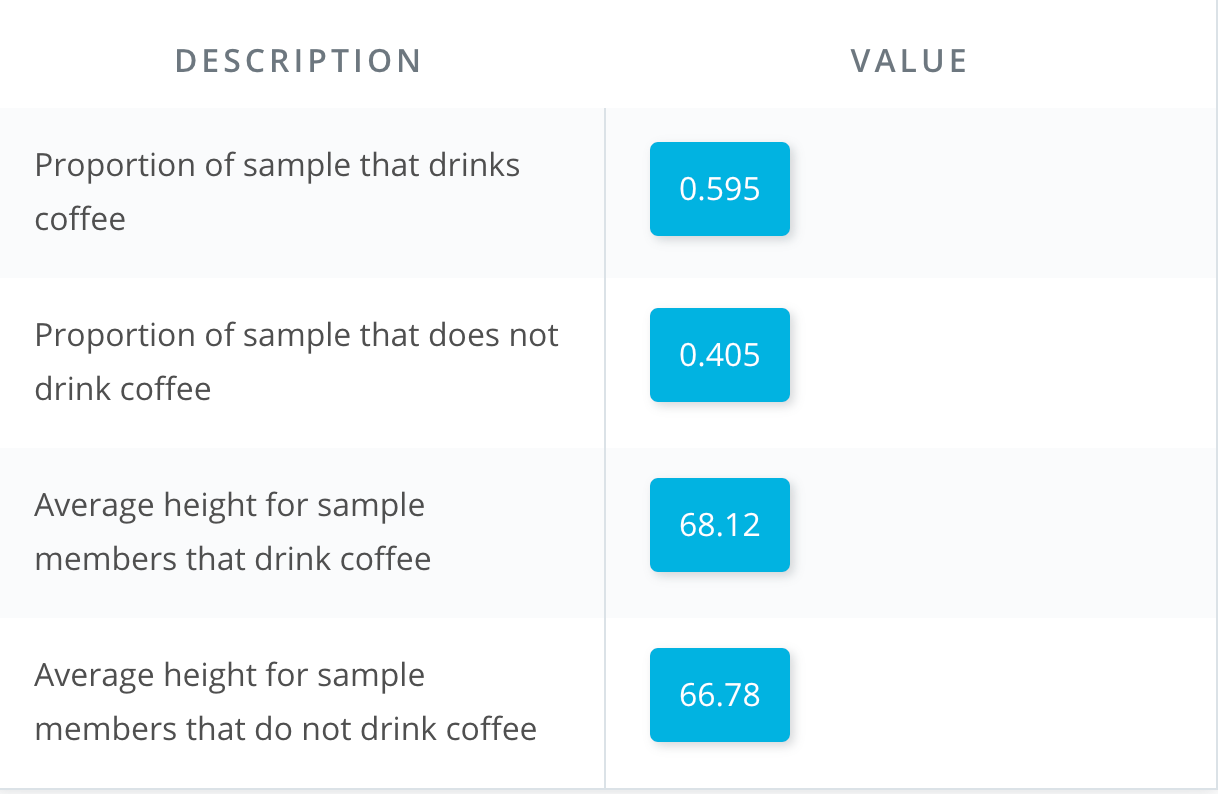

In [51]:
Image(filename='/Users/balance/Desktop/31.png')

2. Of the individuals who drink coffee, what is the average height? Of the individuals who do not drink coffee, what is the average height?

In [13]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2974 entries, 0 to 2973
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        2974 non-null   int64  
 1   age            2974 non-null   object 
 2   drinks_coffee  2974 non-null   bool   
 3   height         2974 non-null   float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 72.7+ KB


In [16]:
(coffee.query('drinks_coffee==True').height).mean()

68.40021025548401

In [17]:
coffee.query('drinks_coffee==True')['height'].mean()

68.40021025548401

In [19]:
coffee.query('drinks_coffee==False')['height'].mean()

66.44340776214705

In [20]:
coffee_red.query('drinks_coffee==True')['height'].mean()

68.11962990858618

In [21]:
coffee_red.query('drinks_coffee==False')['height'].mean()

66.78492279927877

3. Simulate 200 "new" individuals from your original sample of 200. What are the proportion of coffee drinkers in your bootstrap sample? How about individuals that don't drink coffee?

In [23]:
boot=coffee_red.sample(200,replace=True)
boot[boot['drinks_coffee']==True]['height'].mean()

68.25918199231297

In [26]:
1-(boot['drinks_coffee'].mean())

0.395

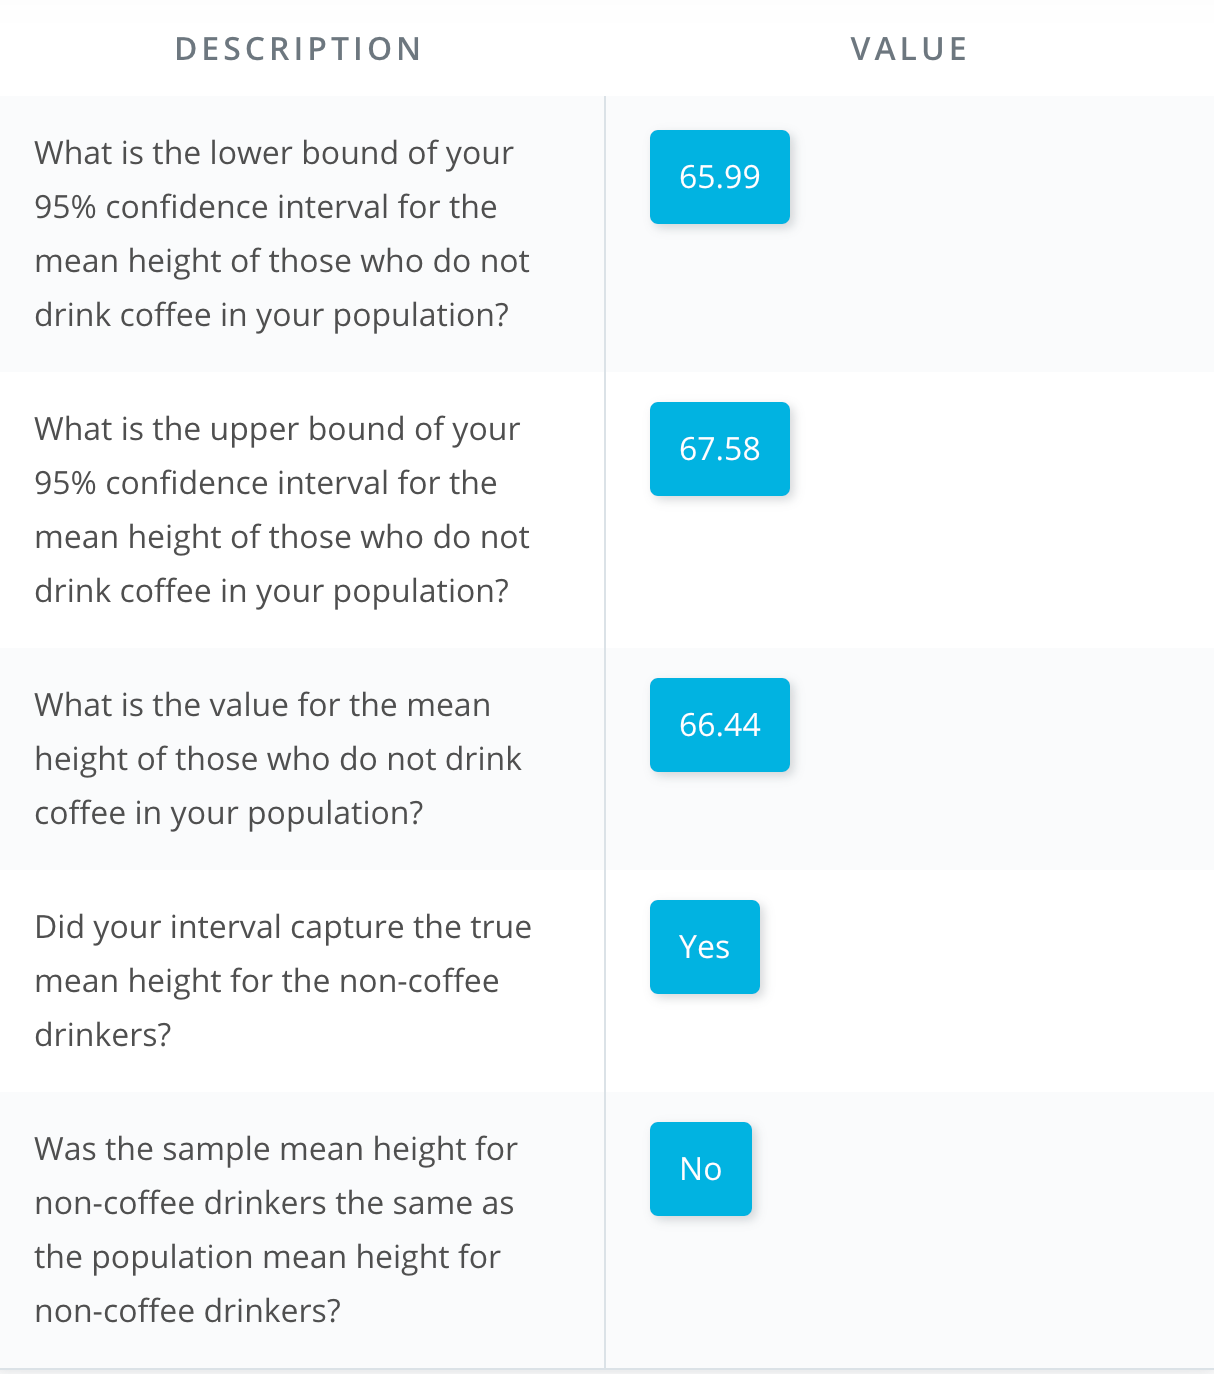

In [53]:
Image(filename='/Users/balance/Desktop/30.png')

4. Now simulate your bootstrap sample 10,000 times and take the mean height of the non-coffee drinkers in each sample. Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?

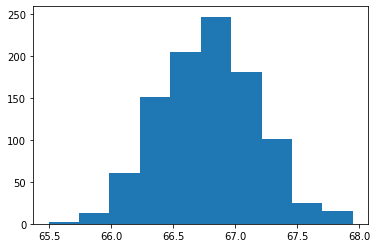

In [35]:
## bootstrap sample 1000 times and take the mean height of non coffee drinker in each sample
    boot_sim = []
for _ in range(1000):
        boot=coffee_red.sample(200, replace=True)
        boot_NonDrink=boot[boot['drinks_coffee']==False]['height'].mean()
        boot_sim.append(boot_NonDrink)
plt.hist(boot_sim);

In [39]:
boot_sim

[66.5947236489471,
 67.13424592380653,
 66.87109690587015,
 67.86849192490908,
 66.18086942509362,
 67.04174952713196,
 66.02789733538725,
 66.91849882525236,
 66.32086501649319,
 66.88502759419721,
 67.0168205045163,
 66.52400260531334,
 66.44998679356038,
 66.67481874376624,
 67.31492591604214,
 66.4056078191955,
 66.88413619464463,
 66.72560857812705,
 66.58539058278029,
 67.2472680056723,
 66.37075269150444,
 67.21967293689228,
 66.68515172086018,
 66.67763660516361,
 67.45961861992795,
 66.39441082215447,
 66.9122141472866,
 66.72808297371023,
 66.91765540531576,
 66.34063004369281,
 66.99816471421119,
 67.28365512452916,
 67.0344216907978,
 66.91288535411255,
 65.9624213678329,
 66.88028249300544,
 66.67198121155421,
 67.01653256845368,
 66.02836934262787,
 66.89984790660002,
 66.70502957452685,
 66.33009015105209,
 66.44524027613473,
 67.05477633649669,
 66.57677442918596,
 66.81280671638297,
 66.44664276309575,
 66.46600987486885,
 66.418971050979,
 67.04787804782528,
 66.62296

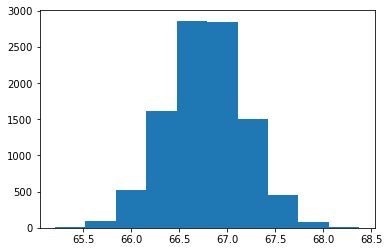

In [43]:
## bootstrap sample 10,000 times and take the mean height of non coffee drinker in each sample

boot_sim = []
for _ in range(10000):
        boot=coffee_red.sample(200, replace=True)
        boot_NonDrink=(boot.query('drinks_coffee==False').height).mean()
        boot_sim.append(boot_NonDrink)
plt.hist(boot_sim);

Plot the distribution, and pull the values necessary for a 95% confidence interval. What do you notice about the sampling distribution of the mean in this example?

In [44]:
np.percentile(boot_sim, 2.5), np.percentile(boot_sim, 97.5)

(65.98690690149438, 67.58237487126078)

5. Did your interval capture the actual average height of coffee drinkers in the population? Look at the average in the population and the two bounds provided by your 95% confidence interval, and then answer the final quiz question below.

In [45]:
coffee[coffee['drinks_coffee'] == False]['height'].mean() 

66.44340776214705

In [46]:
(np.percentile(boot_sim, 2.5) + np.percentile(boot_sim, 97.5))/2

66.78464088637759

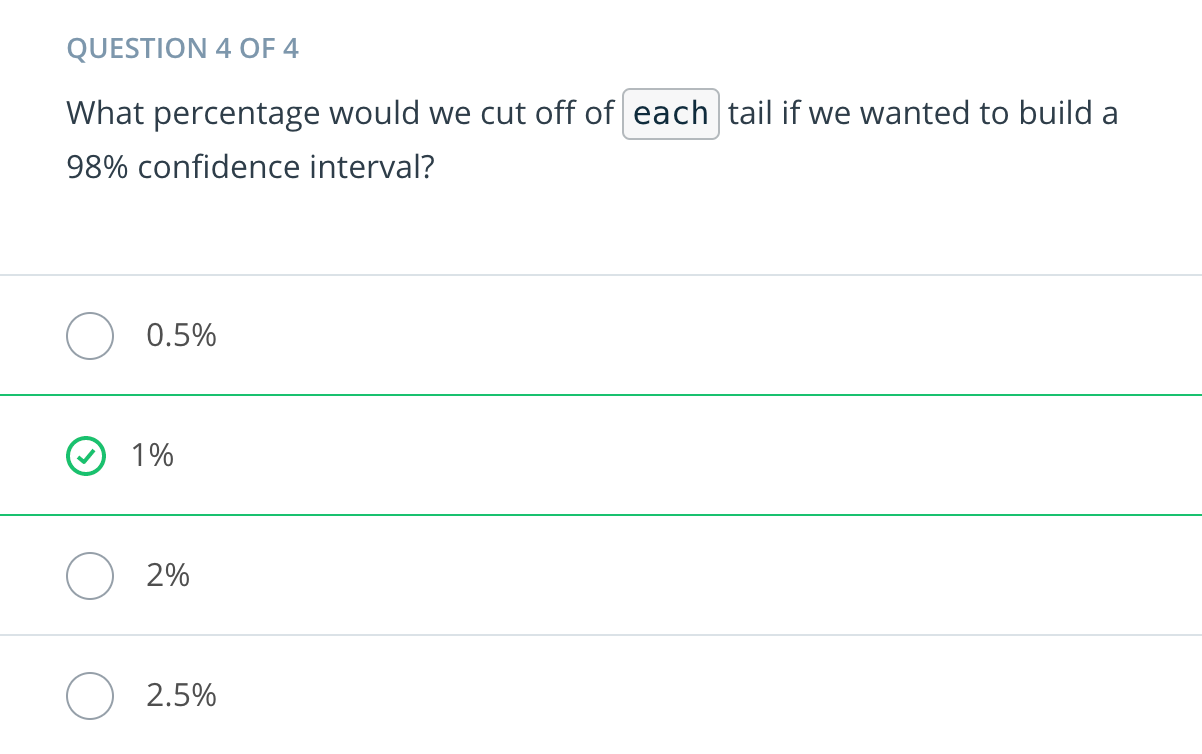

In [54]:
Image(filename='/Users/balance/Desktop/32.png')